In [60]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


# Load Data

In [61]:
df = pd.read_csv(r"D:\ML\Data analysis projects\random projects\Top 100 datasets by votes\kaggle-preprocessed.csv")

In [62]:
df.head()

,Unnamed: 0,Dataset_name,Author_name,Author_id,No_of_files,size,Type_of_file,Upvotes,Medals,Usability,Date,Day,Time,Dataset_link
0,0,Hotel Reservations Dataset,Ahsan Raza,https://www.kaggle.com/ahsan81,1,491 kB,CSV,315,Silver,10.0,1/04/2023,Wed,18:20:31,https://www.kaggle.com/datasets/ahsan81/hotel-...
1,2,Most Subscribed 1000 Youtube Channels,Mrityunjay Pathak,https://www.kaggle.com/themrityunjaypathak,1,29 kB,CSV,76,Bronze,10.0,1/21/2023,Sat,20:12:05,https://www.kaggle.com/datasets/themrityunjayp...
2,3,Olympics 124 years Dataset(till 2020),Nitish Sharma01,https://www.kaggle.com/nitishsharma01,3,5 MB,CSV,30,Bronze,10.0,2/01/2023,Wed,14:30:49,https://www.kaggle.com/datasets/nitishsharma01...
3,4,Medical Student Mental Health,The Devastator,https://www.kaggle.com/thedevastator,2,19 kB,CSV,37,Bronze,10.0,1/25/2023,Wed,06:30:14,https://www.kaggle.com/datasets/thedevastator/...
4,5,Latest Netflix TV shows and movies,Senapati Rajesh,https://www.kaggle.com/senapatirajesh,1,1 MB,CSV,94,Bronze,9.4,1/14/2023,Sat,22:33:12,https://www.kaggle.com/datasets/senapatirajesh...


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9158 entries, 0 to 9157
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9158 non-null   int64  
 1   Dataset_name  9158 non-null   object 
 2   Author_name   9158 non-null   object 
 3   Author_id     9158 non-null   object 
 4   No_of_files   9158 non-null   int64  
 5   size          9158 non-null   object 
 6   Type_of_file  9156 non-null   object 
 7   Upvotes       9158 non-null   int64  
 8   Medals        9158 non-null   object 
 9   Usability     9158 non-null   float64
 10  Date          9158 non-null   object 
 11  Day           9158 non-null   object 
 12  Time          9158 non-null   object 
 13  Dataset_link  9158 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 1001.8+ KB


### drop all unwanted columns

In [64]:
df.drop(['Dataset_link' , 'Author_name' , 'Author_id' , 'No_of_files' , 
           'Type_of_file'  , 'Day' ,'Time' ] ,axis=1 ,  inplace=True)
df.columns

Index(['Unnamed: 0', 'Dataset_name', 'size', 'Upvotes', 'Medals', 'Usability',
       'Date'],
      dtype='object')

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9158 entries, 0 to 9157
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    9158 non-null   int64  
 1   Dataset_name  9158 non-null   object 
 2   size          9158 non-null   object 
 3   Upvotes       9158 non-null   int64  
 4   Medals        9158 non-null   object 
 5   Usability     9158 non-null   float64
 6   Date          9158 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 501.0+ KB


# Clean the data

In [66]:
# convert date to actual dates like in dates dates
df['Date'] = pd.to_datetime(df['Date'])

In [67]:
def convert_to_mb(size):
    size_in_lower = str(size).lower().strip()
    
    if 'mb' in size_in_lower:
        size_in_mb = float(size_in_lower.split("mb")[0].strip())
    elif 'gb' in size_in_lower:
        size_in_gb = float(size_in_lower.split("gb")[0].strip())
        size_in_mb = float(size_in_gb * 1024)
    elif 'kb' in size_in_lower:
        size_in_kb = float(size_in_lower.split("kb")[0].strip())
        size_in_mb = float(size_in_kb / 1024)
    else:
        size_in_mb = 0.0
        
    return size_in_mb

# results

In [68]:
# get datasets that get gold medels 
gold_datasets = df[df['Medals'] == 'Gold'] 
gold_datasets

,Unnamed: 0,Dataset_name,size,Upvotes,Medals,Usability,Date
20,21,Melbourne Housing Snapshot,461 kB,1209,Gold,7.1,2018-06-05
33,34,Trending YouTube Video Statistics,211 MB,4866,Gold,7.9,2019-06-03
34,35,Wine Reviews,53 MB,3408,Gold,7.9,2017-11-27
35,36,Mobile Price Classification,72 kB,1492,Gold,7.1,2018-01-28
36,37,Ramen Ratings,41 kB,829,Gold,7.1,2018-01-11
...,...,...,...,...,...,...,...
8789,9551,siim_dicom_images,2 GB,86,Gold,2.9,2019-06-26
8805,9568,Chai Time Data Science | CTDS.Show,3 MB,189,Gold,9.1,2020-07-23
8807,9570,BSE STOCKS DATA - 15 Minute Interval ( Histori...,110 MB,64,Gold,5.0,2020-12-18
9075,9878,Clubhouse Dataset 9.7M,3 GB,195,Gold,9.4,2021-06-22


<Axes: xlabel='Medals'>

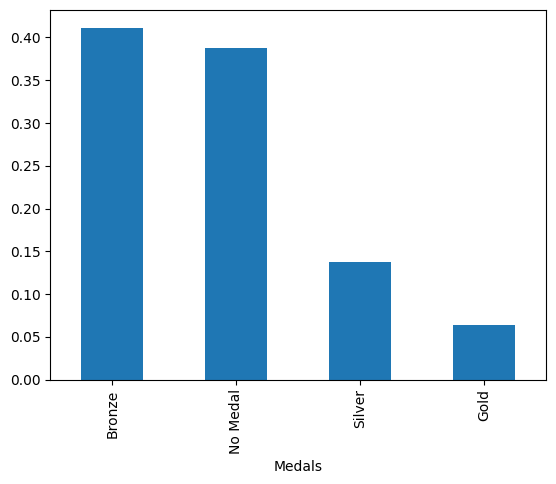

In [69]:
df['Medals'].value_counts(normalize=True).plot(kind='bar')

Text(0.5, 1.0, 'Year which had maximum dataset uploads')

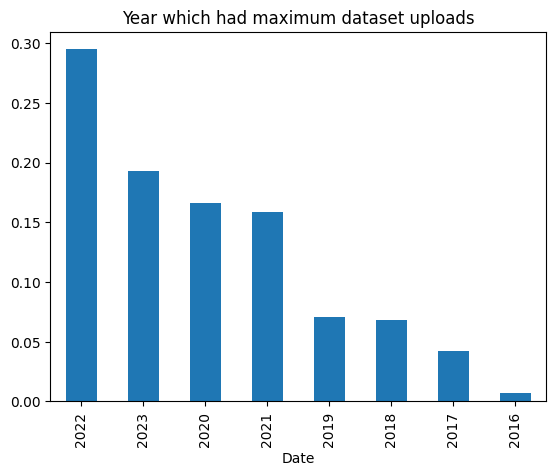

In [70]:
df['Date'].dt.year.value_counts(normalize=True).plot(kind='bar')
plt.title('Year which had maximum dataset uploads')

In [71]:
# get DATASET with highest number of votes
df[df['Upvotes'] == df['Upvotes'].max()]

,Unnamed: 0,Dataset_name,size,Upvotes,Medals,Usability,Date
57,59,Animal Crossing New Horizons Catalog,591 kB,27619,Gold,8.2,2021-06-08


In [72]:
# new df to hold datasets that were published after 2022
df_2022_up = df[df['Date']>= '2022-01-01']

# sort by votes
votes_desc_df = df_2022_up.sort_values(by='Upvotes',ascending=False)

top_100_df = votes_desc_df.head(100)

In [73]:
# get some descriptions
top_100_df.head()

,Unnamed: 0,Dataset_name,size,Upvotes,Medals,Usability,Date
902,975,COVID-19 World Vaccination Progress,2 MB,2121,Gold,10.0,2022-03-31
2263,2450,Date Fruit Datasets,418 kB,1947,Gold,9.4,2022-04-03
420,450,US Accidents (2016 - 2021),282 MB,1734,Gold,10.0,2022-03-12
634,679,International football results from 1872 to 2022,1 MB,1651,Gold,10.0,2022-12-18
3129,3372,Acoustic Extinguisher Fire Dataset,636 kB,1649,Silver,9.4,2022-04-03


In [74]:
top_100_df['size_in_mb'] = top_100_df['size'].apply(convert_to_mb);

# delete the old size column
del top_100_df['size']

top_100_df.info();
top_100_df.sample(5);

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 902 to 289
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    100 non-null    int64         
 1   Dataset_name  100 non-null    object        
 2   Upvotes       100 non-null    int64         
 3   Medals        100 non-null    object        
 4   Usability     100 non-null    float64       
 5   Date          100 non-null    datetime64[ns]
 6   size_in_mb    100 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 6.2+ KB


C:\Users\Youssif Allam\AppData\Local\Temp\ipykernel_2728\2649517300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_100_df['size_in_mb'] = top_100_df['size'].apply(convert_to_mb);


In [75]:
top_100_df.describe().T

,count,mean,min,25%,50%,75%,max,std
Unnamed: 0,100.0,2109.77,0.0,814.0,1516.5,2810.5,9511.0,1905.104853
Upvotes,100.0,509.6,160.0,195.75,312.5,608.75,2121.0,474.429674
Usability,100.0,9.348,3.1,9.4,10.0,10.0,10.0,1.320811
Date,100,2022-07-20 20:09:36,2022-01-11 00:00:00,2022-04-03 00:00:00,2022-07-16 12:00:00,2022-11-10 00:00:00,2023-02-07 00:00:00,NaN
size_in_mb,100.0,1545.652246,0.0,0.07959,1.5,28.0,69632.0,7762.788258
